In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('archive\data.csv')

In [66]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [67]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

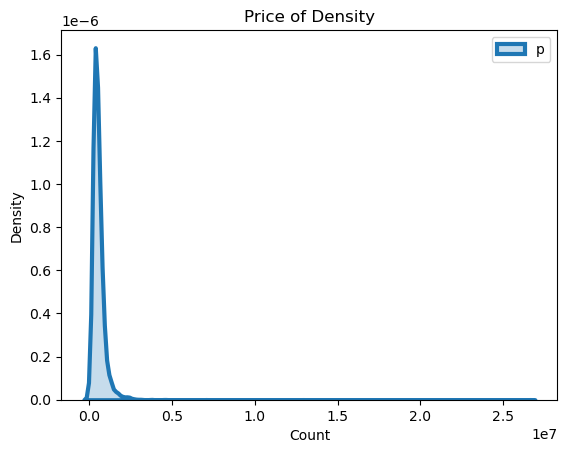

In [68]:
import warnings

warnings.filterwarnings('ignore')
sns.distplot(df['price'], hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel('Count')
plt.ylabel('Density')
plt.title('Price of Density')
plt.legend('price')

In [69]:
np.mean(df['price'])
np.sqrt(np.var(df['price']))

563773.4128352863

In [70]:
bedroom = df['bedrooms'].value_counts()
bedroom

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

In [71]:
import plotly.express as px
fig = px.pie(df, values='price', names='bedrooms')
fig.show()

In [72]:
new_df = df.copy()
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [73]:
new_df = new_df.drop(['street', 'statezip', 'date'], axis = 1)
b=(new_df.columns)

In [74]:
new_df['city'] = pd.factorize(df['city'])[0]
new_df['country'] = pd.factorize(df['country'])[0]

In [75]:
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,1,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4,0


In [76]:
from sklearn.preprocessing import StandardScaler
a =  StandardScaler()

In [77]:
new_df = a.fit_transform(new_df)

In [78]:
new_df = pd.DataFrame(new_df, columns = b)

In [79]:
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,-0.932857,0.0
1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,-0.823706,0.0
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,-0.714556,0.0
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,-0.605405,0.0
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,-0.496255,0.0


In [81]:
x = new_df.drop(['price'], axis = 1)
y = new_df[['price']]

In [83]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [91]:
y_pred = model.predict(x_test)
y_pred, y_test

(array([[-0.25244712],
        [-0.45351774],
        [ 0.38697823],
        ...,
        [ 0.2303929 ],
        [-0.2696567 ],
        [-0.26309985]]),
          price
 2275  0.063921
 4105 -0.287284
 3249 -0.275754
 1888 -0.320985
 3614 -0.376149
 ...        ...
 4200  0.055052
 679  -0.015898
 1634 -0.163298
 2512 -0.296153
 183  -0.171989
 
 [1150 rows x 1 columns])

In [99]:
test_x_values = x_test

In [100]:
test_x_values['price'] = y

In [95]:
model.intercept_, model.coef_

(array([0.0037458]),
 array([[-0.09085063,  0.09094896,  0.21626938, -0.02876764,  0.0066025 ,
          0.04673578,  0.06590049,  0.05543017,  0.20858409,  0.06135563,
         -0.0936839 ,  0.00736144, -0.07823491,  0.        ]]))

In [102]:
test_x_values['predicted_price'] = y_pred

In [104]:
test_x_values['diff price'] = test_x_values['price'] - test_x_values['predicted_price']
test_x_values

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,price,predicted_price,diff price
2275,0.659291,-0.205201,-0.476945,-0.274592,-0.951388,-0.085004,-0.309194,-0.667112,-0.982821,0.835875,-0.699202,1.221670,-0.823706,0.0,0.063921,-0.252447,0.316368
4105,-0.441122,-0.524202,-0.996101,0.047365,-0.951388,-0.085004,-0.309194,0.809652,-0.750822,-0.672464,-0.127362,-0.825693,0.704400,0.0,-0.287284,-0.453518,0.166234
3249,-0.441122,0.432802,0.467918,0.115034,-0.951388,-0.085004,-0.309194,0.809652,0.884766,-0.672464,0.175376,1.208396,-0.714556,0.0,-0.275754,0.386978,-0.662733
1888,-0.441122,-0.843204,-0.746906,-0.288527,-0.951388,-0.085004,-0.309194,-0.667112,-0.472424,-0.672464,-0.396463,1.205332,-0.823706,0.0,-0.320985,-0.283049,-0.037936
3614,-0.441122,-1.481206,-0.975335,-0.160686,-0.951388,-0.085004,-0.309194,2.286416,-0.727623,-0.672464,-0.060087,-0.825693,1.905055,0.0,-0.376149,-0.543619,0.167470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,-0.441122,0.432802,0.478301,-0.271805,0.906555,-0.085004,0.975624,-0.667112,0.896366,-0.672464,0.915404,1.222692,1.031852,0.0,0.055052,0.211998,-0.156946
679,-1.541536,-0.205201,0.239490,5.656200,-0.022416,-0.085004,-0.309194,-0.667112,-0.263626,0.986709,0.713578,-0.825693,0.595250,0.0,-0.015898,-0.161210,0.145312
1634,-0.441122,-0.524202,0.457535,-0.107371,-0.951388,-0.085004,-0.309194,0.809652,-0.623223,2.107189,-0.665564,1.215544,-0.605405,0.0,-0.163298,0.230393,-0.393691
2512,0.659291,0.432802,-0.092770,-0.266900,0.906555,-0.085004,-0.309194,-0.667112,0.258370,-0.672464,1.184505,-0.825693,1.031852,0.0,-0.296153,-0.269657,-0.026496


In [97]:
model.score(x_test, y_test)

0.5456473123355992

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [115]:
mse = mean_squared_error(y_test, y_pred)
mse

0.18958131750870386

In [116]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.27804245007861006

In [117]:
r2 = r2_score(y_test, y_pred)
r2

0.5456473123355992

In [1]:
from multiprocessing import cpu_count

In [2]:
cpu_count()

8